In [1]:
import sys
sys.path.append('..')

In [2]:
from IPython.display import display
%config InlineBackend.figure_format='retina'

In [3]:
from configs.structure import Config
from environment.thieves_guardians_env import TGEnv
from tuning.comparison import read_models, play_all_pairs, compute_team_results, plot_team_aggregates, plot_boxplot

## Get results

In [4]:
# Read models from disk
all_policies, model_names = read_models()

❗ Make sure all models in `models_dir` were trained on the same environment that is instantiated below:

In [5]:
# Re-instantiate the environment
config = Config()
config.scenario = '6x6,2v2'
config.state_representation = 'coordinates'

env = TGEnv(config)

In [6]:
%%time
# Have all thieves play against all guardians
all_results = play_all_pairs(env, all_policies, model_names, num_episodes=10)

CPU times: user 9.55 s, sys: 8.74 ms, total: 9.56 s
Wall time: 9.56 s


## Plot results

,avg_rewards,winrate
thieves_model,,
scripted,0.66,0.66
22 Nov 18.59.40 iterations-15.tar,0.49,0.49
22 Nov 18.59.40 iterations-35.tar,0.45,0.45
22 Nov 18.59.40 iterations-40.tar,0.45,0.45
22 Nov 18.59.40 iterations-5.tar,0.45,0.45
22 Nov 18.59.40 iterations-20.tar,0.44,0.44
22 Nov 18.59.40 iterations-49.tar,0.42,0.42
22 Nov 18.59.40 iterations-45.tar,0.41,0.41
22 Nov 18.59.40 iterations-25.tar,0.38,0.38


,avg_rewards,winrate
guardians_model,,
22 Nov 18.59.40 iterations-45.tar,0.78,0.59
22 Nov 18.59.40 iterations-10.tar,0.78,0.64
22 Nov 18.59.40 iterations-20.tar,0.76,0.56
22 Nov 18.59.40 iterations-25.tar,0.76,0.62
22 Nov 18.59.40 iterations-30.tar,0.74,0.64
22 Nov 18.59.40 iterations-49.tar,0.72,0.58
22 Nov 18.59.40 iterations-35.tar,0.71,0.55
22 Nov 18.59.40 iterations-5.tar,0.71,0.55
22 Nov 18.59.40 iterations-40.tar,0.71,0.55


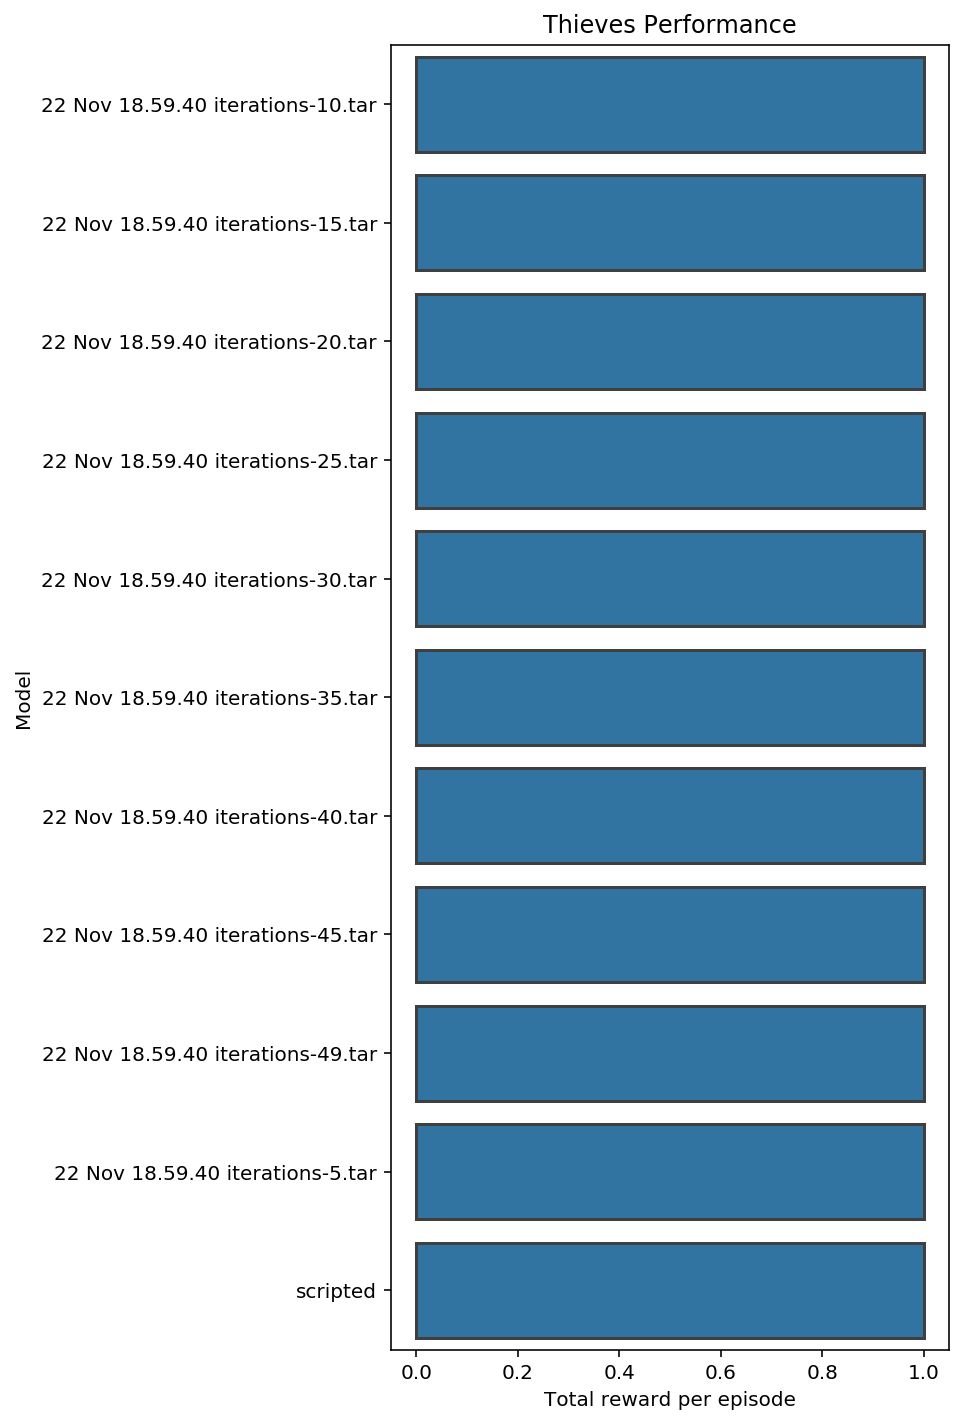

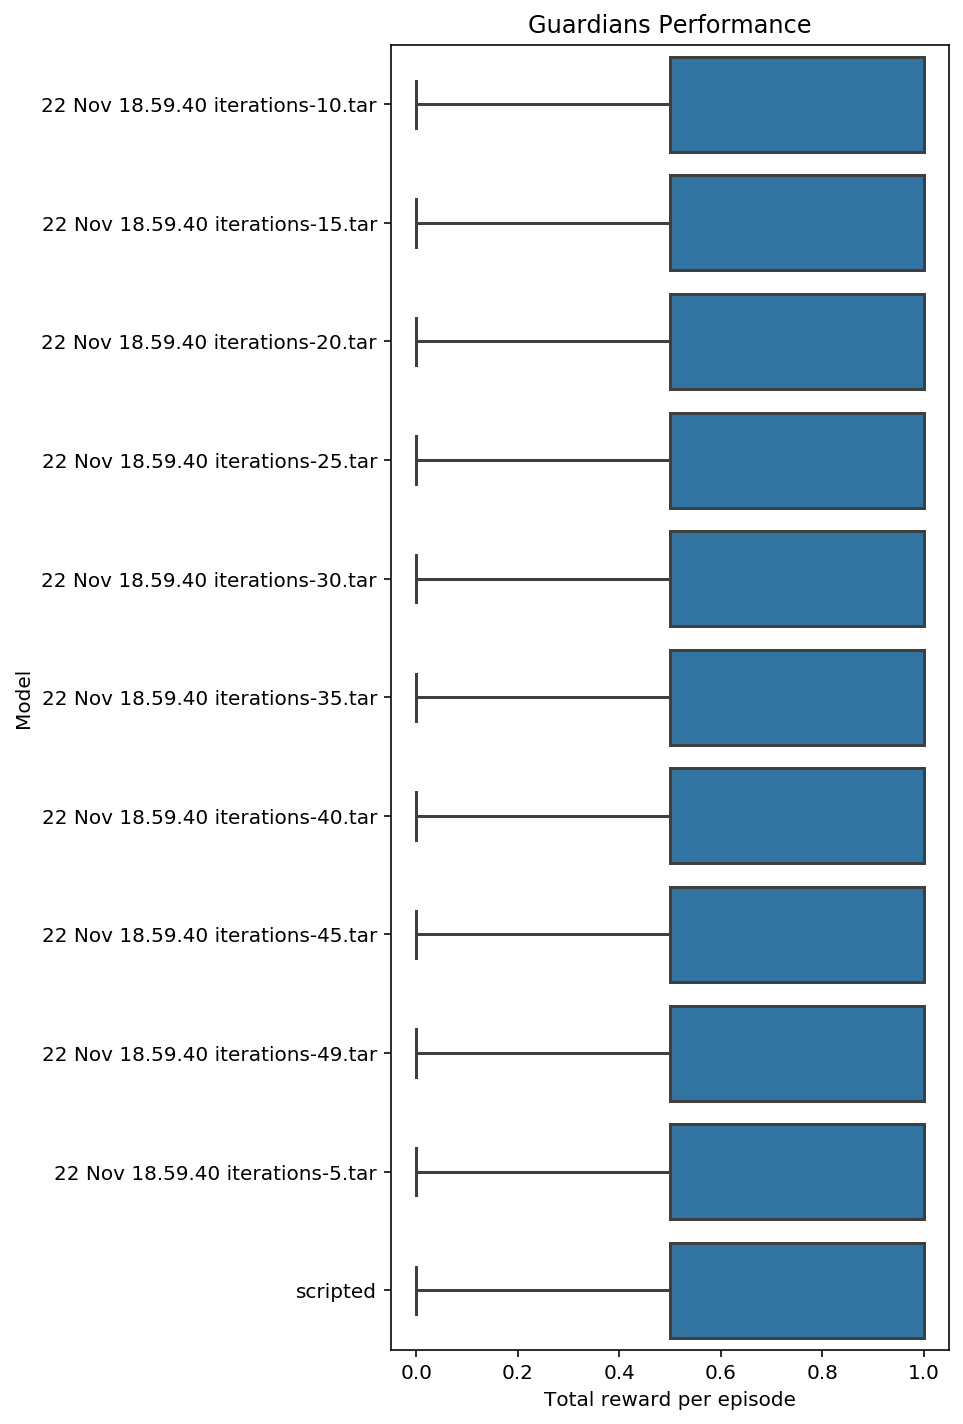

In [7]:
for team in ['thieves', 'guardians']:
    aggregates_df, team_rewards, models_order = plot_team_aggregates(all_results, team)
    display(aggregates_df)
    plot_boxplot(team_rewards, models_order, team)